# MOwNiT 
## Laboratorium 8 - Znajdowanie pierwiastków

In [1]:
using Roots, Plots, ForwardDiff, LinearAlgebra, Statistics, DataFrames, CSV

## Zadania:

### Zadanie 1A. (0 pkt) 
Wybrać trzy metody poszukiwania pierwiastków: 
* wykorzystującą przedział i zmianę znaku, 
* wykorzystującą pochodną, 
* wykorzystującą przybliżenie pochodnej

In [2]:
tracker = Roots.Tracks()
bisection(f) = find_zero(f, (0, 1), Bisection(), tracks = tracker)

D(f) = x -> ForwardDiff.derivative(f, float(x))
newton(f) = find_zero((f, D(f)), 0, Roots.Newton(), tracks = tracker)

steffenson(f) = find_zero(f, 0, Order2(), tracks = tracker)

methods = [bisection, newton, steffenson]

3-element Vector{Function}:
 bisection (generic function with 1 method)
 newton (generic function with 1 method)
 steffenson (generic function with 1 method)

### Zadanie 1B. (3 pkt) 
Każdą z trzech wybranych metod przetestować (ilość iteracji, ilość wywołań funkcji) na sześciu wybranych funkcjach ze zbioru http://people.sc.fsu.edu/~jburkardt/py_src/test_zero/test_zero.html Wyniki przedstawić w formie tabelki. 
<b>Pamiętać o sprawdzeniu czy wynik jest poprawny poprzez obliczenie wartości funkcji dla znalezionego pierwiastka !</b>

Wybrane funkcje:

$f_1(x) = sin(x) - \frac{x}{2}$

$f_2(x) = 2x - e^{-x}$

$f_3(x) = x \cdot e^{-x}$

$f_4(x) = (x + 3) \cdot (x - 1)^2$

$f_5(x) = cos(x) - x$

$f_6(x) = (x-1)^7 = x^7 − 7x^6 + 21x^5 − 35x^4 + 35x^3 − 21x^2 + 7x − 1$

In [3]:
f1(x) = sin(x) - x / 2
f2(x) = 2 * x - exp(-x)
f3(x) = x * exp(-x)
f4(x) = (x + 3) * (x - 1)^2
f5(x) = cos(x) - x
f6(x) = x^7 − 7 * x^6 + 21 * x^5 − 35*x^4 + 35 * x^3 − 21 * x^2 + 7 * x − 1

funcs = [f1, f2, f3, f4, f5, f6]

6-element Vector{Function}:
 f1 (generic function with 1 method)
 f2 (generic function with 1 method)
 f3 (generic function with 1 method)
 f4 (generic function with 1 method)
 f5 (generic function with 1 method)
 f6 (generic function with 1 method)

In [4]:
struct Row
    testFunc::Function
    method::Function
    numOfIterations::Float64
    numOfCalls::Float64
end

In [5]:
rows = Row[]

for func in funcs
    for method in methods
        x = method(func)
        if func(x) != 0
            println("Result of function ", func, " using method '", method, "' isn't zero: ", func(x))
        end
        push!(rows, Row(func, method, tracker.steps, tracker.fncalls))
        empty!(tracker)
    end
end

Result of function f2 using method 'newton' isn't zero: -1.1102230246251565e-16
Result of function f4 using method 'newton' isn't zero: 4.564959859473074e-16
Result of function f4 using method 'steffenson' isn't zero: 5.483192153677992e-16
Result of function f6 using method 'newton' isn't zero: -5.773159728050814e-14
Result of function f6 using method 'steffenson' isn't zero: -2.7169662075721135e-9


In [6]:
df = DataFrame(rows)

df

Row,testFunc,method,numOfIterations,numOfCalls
,Function,Function,Float64,Float64
1,f1,bisection,0.0,3.0
2,f1,newton,1.0,2.0
3,f1,steffenson,0.0,2.0
4,f2,bisection,61.0,64.0
5,f2,newton,4.0,8.0
6,f2,steffenson,5.0,9.0
7,f3,bisection,0.0,3.0
8,f3,newton,1.0,2.0
9,f3,steffenson,0.0,2.0


### Zadanie 1C. (2 pkt) 
Zademonstrować wybrany, ciekawy przykład trudnej funkcji z p.1 i działania metod na niej. 

    

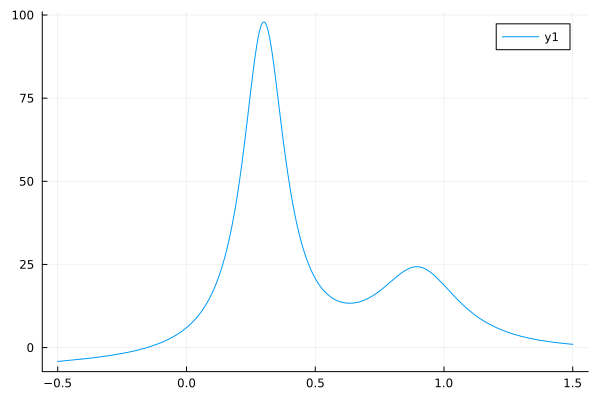

In [7]:
camel(x) = 1.0 / ((x - 0.3)^2 + 0.01) + 1.0 / ((x - 0.9)^2 + 0.04) + 2 * x -5.2

xs = -0.5:2
plot(camel, extrema(xs)...)

In [8]:
println("Bisection:")
empty!(tracker)
x = find_zero(camel, (-1, 1.5), Bisection(), tracks = tracker)
println("x = $(x), f(x) = $(camel(x)), iszero?: $(iszero(camel(x)))")
println("Steps: $(tracker.steps), Function calls: $(tracker.fncalls)\n")


println("Newton:")
empty!(tracker)
x = newton(camel)
println("x = $(x), f(x) = $(camel(x)), iszero?: $(iszero(camel(x)))")
println("Steps: $(tracker.steps), Function calls: $(tracker.fncalls)\n")


println("Steffenson:")
empty!(tracker)
x = steffenson(camel)
println("x = $(x), f(x) = $(camel(x)), iszero?: $(iszero(camel(x)))")
println("Steps: $(tracker.steps), Function calls: $(tracker.fncalls)")

Bisection:
x = -0.1534804948126991, f(x) = 8.881784197001252e-16, iszero?: false
Steps: 62, Function calls: 65

Newton:
x = -0.15348049481269913, f(x) = -8.881784197001252e-16, iszero?: false
Steps: 6, Function calls: 12

Steffenson:
x = -0.15348049481269913, f(x) = -8.881784197001252e-16, iszero?: false
Steps: 7, Function calls: 11


### Zadanie 1D. (3pkt) 
Dla każdej z wybranych metod zademonstrować i wyjaśnić po jednym  przykładzie, dla którego nie działają (można na podstawie p.1 lub wymyślić własny)

### Zadanie 2. (1 pkt) 
Narysować <a href="https://pl.wikipedia.org/wiki/Wst%C4%99ga_Newtona"> wstegę Newtona </a> i objaśnić, w jaki sposób powstała i jaki jest jej związek z metodą Newtona do znajdowania pierwiastków. Sposób i język - dowolny. 

Wstęga została stworzona poprzez wywołanie dla każdego elementu w macierzy 1000x1000 (liczby zespolone) metody Newtona i sprawdzenie, do którego z pierwiastków się zbliżyliśmy. 
Prezentowany przykład korzysta z funkcji $f(z) = z^3 - 1$

```python
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormp

```

```python
def newton(z0, f, fprime):
    z = z0
    for _ in range(1000):
        dz = f(z) / fprime(z)
        if abs(dz) < 1.e-8:
            return z
        z -= dz
    return False

def find_root(roots, r):
    try:
        return np.where(np.isclose(roots, r, atol=1.e-8))[0][0]
    except IndexError:
        roots.append(r)
        return len(roots) - 1

def build(f, fprime, n=200):
    roots = []
    m = np.zeros((n, n))

    for idx, x in enumerate(np.linspace(-1, 1, n)):
        for idy, y in enumerate(np.linspace(-1, 1, n)):
            z0 = x + y*1j
            r = newton(z0, f, fprime)
            if r is not False:
                ir = find_root(roots, r)
                m[idy, idx] = ir
    return m
```

```python
matrix = build(lambda z: z**3 - 1, lambda z: 3*z**2, n=1000)
plt.imshow(matrix, cmap=ListedColormap(['cyan', 'olive', 'violet']), origin='lower')
plt.axis('off')
plt.show()
```

Rezultat:

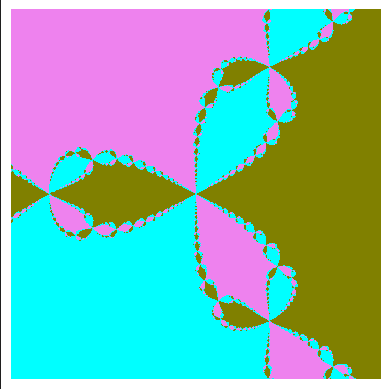

Dla porównania Wikipedia:

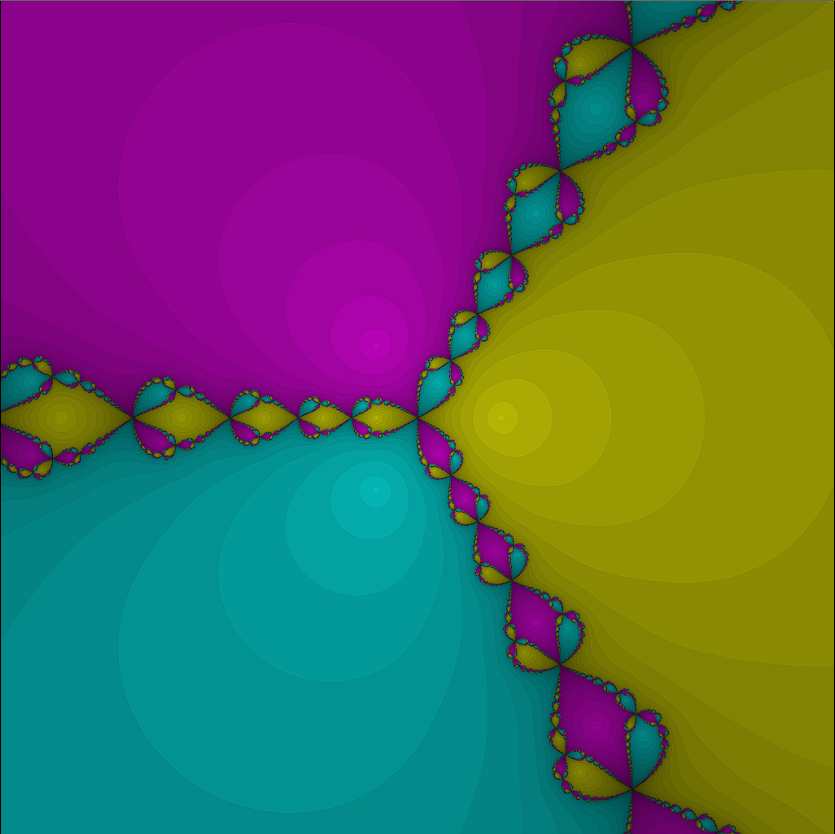